In [62]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# Connect to the SQLite database
conn = sqlite3.connect('european_database.sqlite')

##### How Teams evolved over the years

In [64]:
cursor = conn.cursor()

# Execute the SQL query to rank teams
query = (''' 
WITH TeamPoints AS (
    SELECT
        HomeTeam AS Team,
        SUM(CASE WHEN FTR = 'H' THEN 3 WHEN FTR = 'D' THEN 1 ELSE 0 END) AS Points
    FROM
        matchs
    GROUP BY
        Team
    UNION ALL
    SELECT
        AwayTeam AS Team,
        SUM(CASE WHEN FTR = 'A' THEN 3 WHEN FTR = 'D' THEN 1 ELSE 0 END) AS Points
    FROM
        matchs
    GROUP BY
        Team
)
SELECT
    t.Team,
    SUM(tp.Points) AS TotalPoints,
    SUM(t.FTHG) - SUM(t.FTAG) AS GoalDifference
FROM
    TeamPoints tp
        JOIN
    (
        SELECT DISTINCT
            HomeTeam AS Team,
            FTHG,
            FTAG
        FROM
            matchs
        UNION ALL
        SELECT DISTINCT
            AwayTeam AS Team,
            FTAG,
            FTHG
        FROM
            matchs
    ) t
    ON
            tp.Team = t.Team
GROUP BY
    t.Team
ORDER BY
    TotalPoints DESC,
    GoalDifference DESC;
''')
# Execute the query
cursor.execute(query)

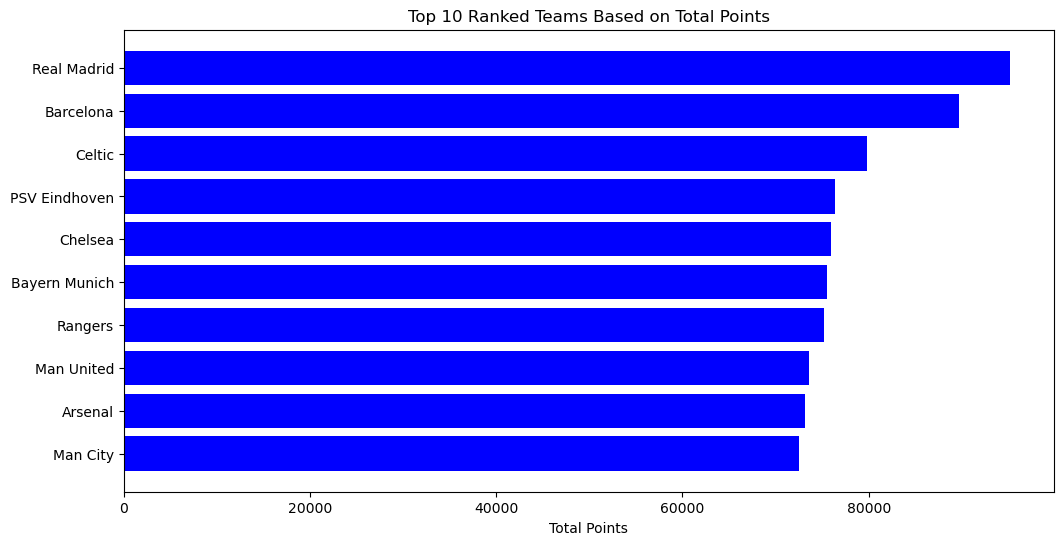

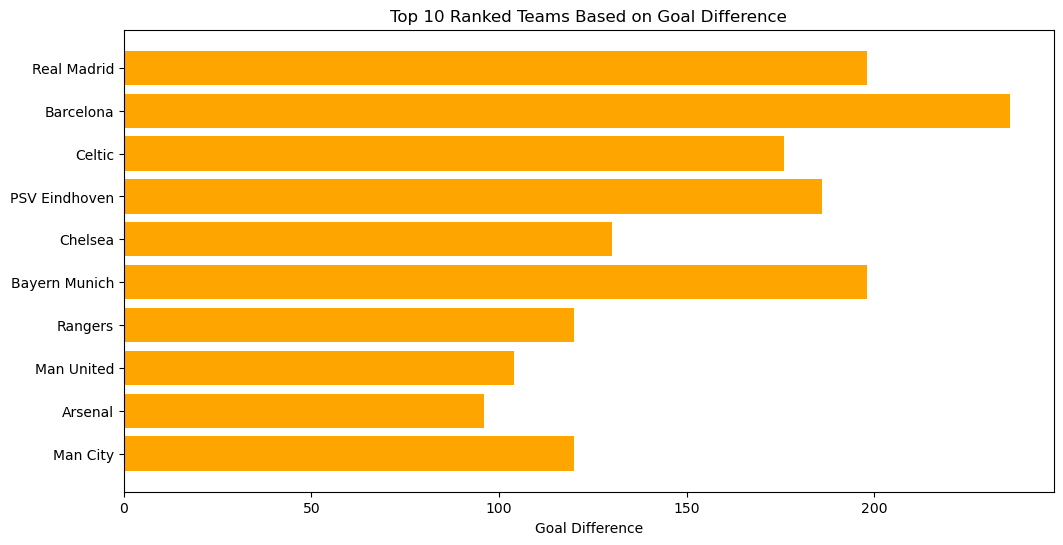

In [65]:
# Fetch the top 10 ranked teams
results = cursor.fetchmany(10)

# Extract team names, total points, and goal differences
teams = [row[0] for row in results]
total_points = [row[1] for row in results]
goal_differences = [row[2] for row in results]
# Create a bar chart to visualize the top 10 teams based on Total Points
plt.figure(figsize=(12, 6))
plt.barh(teams, total_points, color='blue')
plt.xlabel('Total Points')
plt.title('Top 10 Ranked Teams Based on Total Points')
plt.gca().invert_yaxis()
plt.show()

# Create a bar chart to visualize the top 10 teams based on Goal Difference
plt.figure(figsize=(12, 6))
plt.barh(teams, goal_differences, color='orange')
plt.xlabel('Goal Difference')
plt.title('Top 10 Ranked Teams Based on Goal Difference')
plt.gca().invert_yaxis()
plt.show()

##### Real Madrid Performance

In [66]:
# Define the team name (e.g., 'Real Madrid')
team_name = 'Real Madrid'

# Execute an SQL query to retrieve relevant data for Real Madrid
cursor.execute('''
SELECT
    season,
    SUM(CASE WHEN HomeTeam = ? THEN FTHG ELSE FTAG END) - SUM(CASE WHEN AwayTeam = ? THEN FTHG ELSE FTAG END) AS GoalDifference,
    SUM(CASE WHEN HomeTeam = ? AND FTR = 'H' THEN 3 WHEN AwayTeam = ? AND FTR = 'A' THEN 3 WHEN FTR = 'D' THEN 1 ELSE 0 END) AS TotalPoints
FROM
    matchs
WHERE
    HomeTeam = ? OR AwayTeam = ?
GROUP BY
    season
ORDER BY
    season
''', (team_name, team_name, team_name, team_name, team_name, team_name))

# Fetch the results
results = cursor.fetchall()

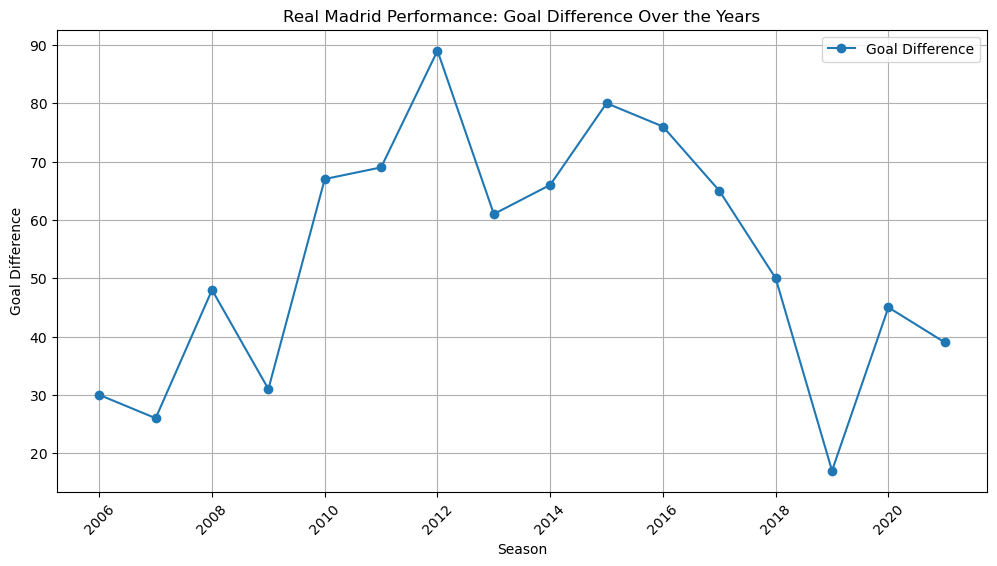

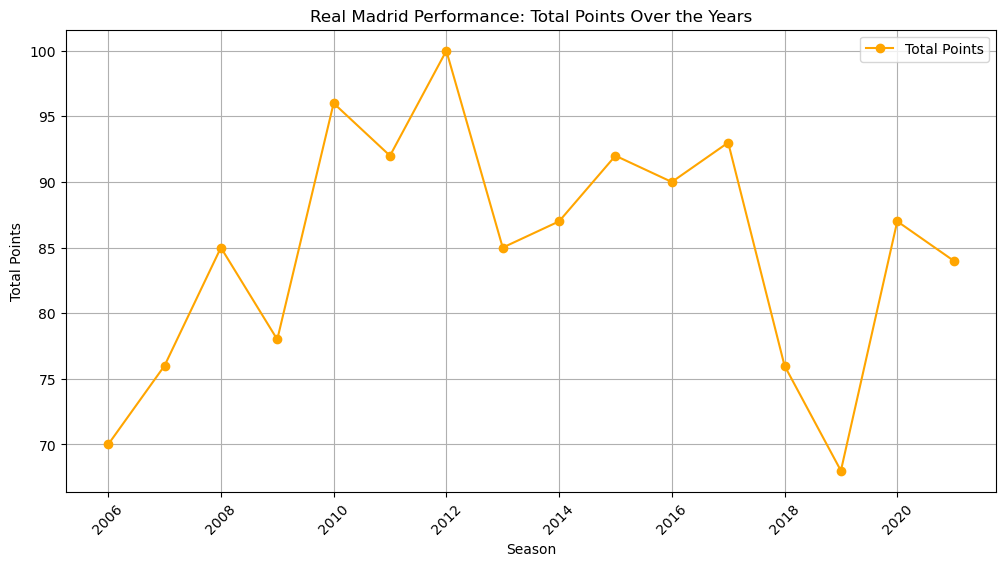

In [67]:
# Extract season, goal difference, and total points from the results
seasons = [row[0] for row in results]
goal_differences = [row[1] for row in results]
total_points = [row[2] for row in results]

# Create a line chart to visualize Real Madrid's goal difference over the years
plt.figure(figsize=(12, 6))
plt.plot(seasons, goal_differences, marker='o', linestyle='-', label='Goal Difference')
plt.xlabel('Season')
plt.ylabel('Goal Difference')
plt.title('Real Madrid Performance: Goal Difference Over the Years')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Create a line chart to visualize Real Madrid's total points over the years
plt.figure(figsize=(12, 6))
plt.plot(seasons, total_points, marker='o', linestyle='-', label='Total Points', color='orange')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.title('Real Madrid Performance: Total Points Over the Years')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [68]:
# Define the team name (e.g., 'Real Madrid')
team_name = 'Real Madrid'

In [69]:
# Execute an SQL query to retrieve relevant data for the specified team
cursor.execute('''
SELECT
    season,
    SUM(CASE WHEN HomeTeam = ? THEN FTHG ELSE FTAG END) - SUM(CASE WHEN AwayTeam = ? THEN FTHG ELSE FTAG END) AS GoalDifference,
    SUM(CASE WHEN HomeTeam = ? AND FTR = 'H' THEN 3 WHEN AwayTeam = ? AND FTR = 'A' THEN 3 WHEN FTR = 'D' THEN 1 ELSE 0 END) AS TotalPoints
FROM
    matchs
WHERE
    (HomeTeam = ? OR AwayTeam = ?)
GROUP BY
    season
ORDER BY
    season
''', (team_name, team_name, team_name, team_name, team_name, team_name))

# Fetch the results
results = cursor.fetchall()

In [70]:
# Extract season and goal difference from the results
seasons = [row[0] for row in results]
goal_differences = [row[1] for row in results]

# Calculate changes in goal difference between consecutive seasons
goal_difference_changes = [goal_differences[i] - goal_differences[i - 1] for i in range(1, len(goal_differences))]

# Identify seasons with dramatic changes in goal difference
dramatic_changes = []
for i, change in enumerate(goal_difference_changes):
    if abs(change) >= 20:  # Adjust the threshold as needed
        dramatic_changes.append((seasons[i], seasons[i + 1], change))

# Display seasons with dramatic changes in performance
for change in dramatic_changes:
    print(f"Season {change[0]} to {change[1]}: Change in Goal Difference = {change[2]}")

Season 2007 to 2008: Change in Goal Difference = 22.0
Season 2009 to 2010: Change in Goal Difference = 36.0
Season 2011 to 2012: Change in Goal Difference = 20.0
Season 2012 to 2013: Change in Goal Difference = -28.0
Season 2018 to 2019: Change in Goal Difference = -33.0
Season 2019 to 2020: Change in Goal Difference = 28.0
